This notebook is an analysis of the reproductive size trade off 4x5 run. 
There are seven PFTs that differ only in their reproductive size.


In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt

Illustrate parameter file

In [63]:
pfile='/glade/u/home/rfisher/python_scripts/fix7trop_htrepro.nc'
params=xr.open_dataset(pfile)
print(params.fates_seed_dbh_repro_threshold)

<xarray.DataArray 'fates_seed_dbh_repro_threshold' (fates_pft: 7)>
array([ 2.,  5., 10., 15., 20., 25., 35.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      cm
    long_name:  the diameter (if any) where the plant will start extra clonal...


Read in single month of data from end of simulation. 

In [64]:
run = 'testnextapi_f45_fates'
scratch = '/glade/scratch/rfisher/'
year = '0099'
month = '06'
file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
f_dat = xr.open_dataset(file)

Plot out LAI sanity test. 

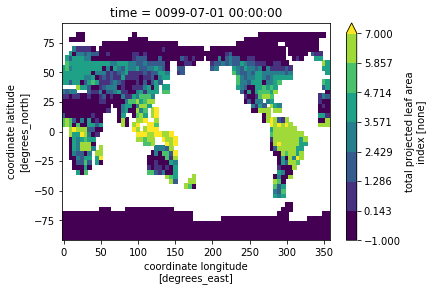

In [65]:
lai = f_dat.TLAI
lai.plot(vmin=-1, vmax=7, levels=8)

Plot fractional biomass of each PFT

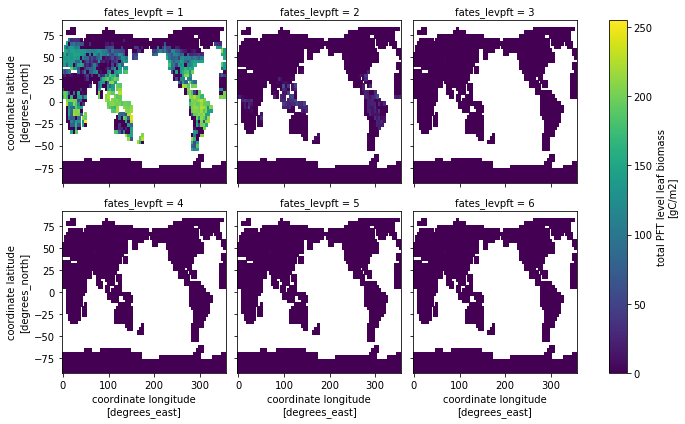

In [66]:
PFTbiomass = f_dat.PFTleafbiomass[0,0:6,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass #/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3)

NOTE: PFT1, with the smallest rescruitment size,  wins after 100 years.  It was winning at the beginning (see below at yer 5) when it was allocating to reproduction and all the other PFTs were still growing. The strategy of overwhelming the seed pool early on seems to be successful. 

I wonder if this would also be the case in 'strict PPA mode'. If the smallest PFT is only punished a little bit for being smaller, but gains a lot from having loads of seedlings? Either way, there are obviously too many recruits...


Year 5 biomass per PFT

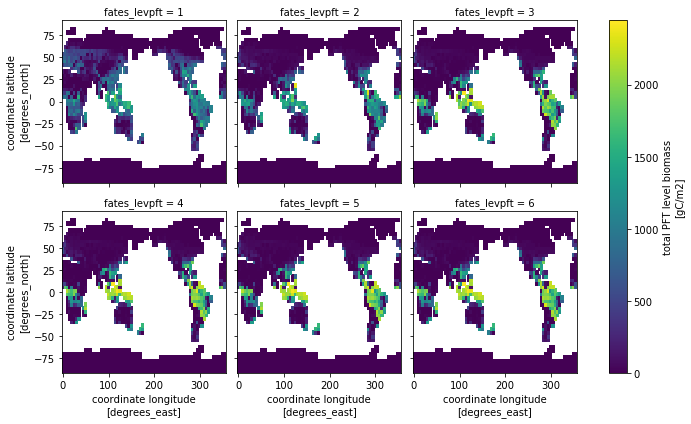

In [69]:
year = '0005'
month = '06'
file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
f_dat = xr.open_dataset(file)
PFTbiomass = f_dat.PFTbiomass[0,0:6,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass #/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3)

Sum indivs. This is too high in general

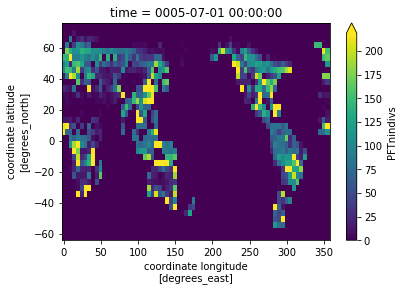

In [52]:
PFTnindivs = f_dat.PFTnindivs[0,0:6,7:42,:]
sumN=np.sum(PFTnindivs,0)
sumN.plot(robust=True)

Plot log N individuals of each PFT

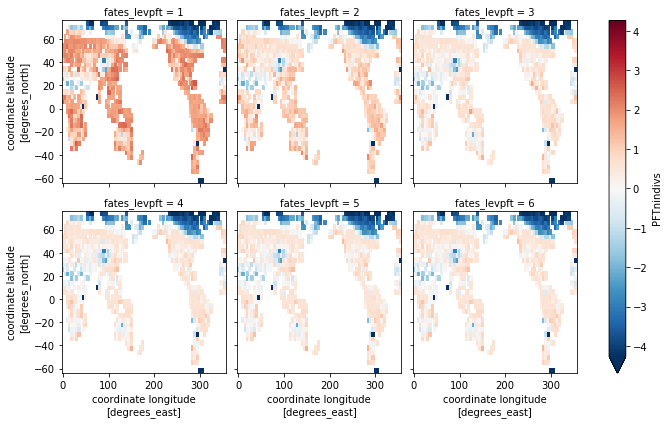

In [53]:
normN = PFTnindivs/sumN
logn=np.log10(PFTnindivs)
pplot = logn.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, robust=True )

Read in timeseries data from archive.  First we'll do this for every June (reading 1200 history files takes prohibitively long) 

In [71]:
arc= scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
dsJUNE = xr.open_mfdataset((arc + '*-06.nc'))

Plot timeseries evolutions of  of maps of fractional quantities (takes up a lot of space so commented it out)

In [61]:
pb = ds.PFTbiomass[:,0:6,:,:] 
sumB=np.sum(pb,1)
pb = pb[:,0,:,:]/sumB
pb.attrs['standard_name'] = 'frac indiv PFT1'
#pplot = pb.plot(x='lon', y='lat', col='time', col_wrap=3 ,robust=True)

Plot out timeseries from specific sites. 

In [12]:
lats = [22,23]
lons = [57, 58, 59, 60, 61, 62 ]
pft=[0,1,2,3,4,5]

Biomass: Illustrates eventual dominance of reproductive strategy. PFT1 in blue, PFT2 in orange, etc. (adding legend messes up plot in a way I don't have the python skillz to fix yet)

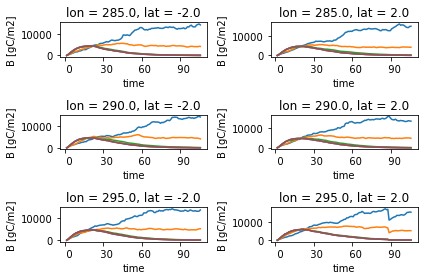

In [79]:
fig, axes = plt.subplots(ncols=2, nrows=3)
dsJUNE.PFTbiomass.attrs['long_name'] = 'B'
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[0], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[1], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[0], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[1], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[0], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=dsJUNE.PFTbiomass.isel(lat=lats[1], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)

plt.tight_layout()
plt.draw()

Individuals: Huge advantage for smallest PFT 

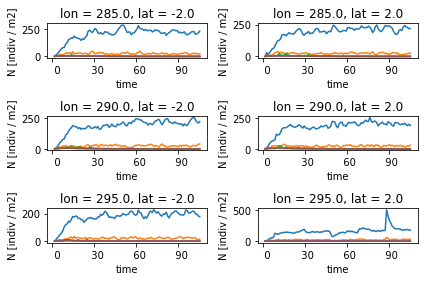

In [76]:
fig, axes = plt.subplots(ncols=2, nrows=3)
dsJUNE.PFTnindivs.attrs['long_name'] = 'N'
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[0], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[1], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[0], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[1], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[0], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=dsJUNE.PFTnindivs.isel(lat=lats[1], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)

plt.tight_layout()
plt.draw()

Now the interesting stuff: This is recruitment, per PFT.
Note the strange dips in recruitment. This is output every June,  so this appears periodic. 

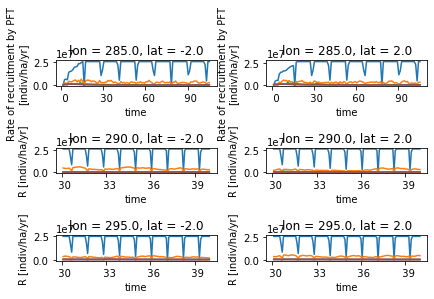

In [74]:
fig, axes = plt.subplots(ncols=2, nrows=3)
ds.RECRUITMENT.attrs['long_name'] = 'R'
pbiomasst=dsJUNE.RECRUITMENT.isel(lat=lats[0], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=dsJUNE.RECRUITMENT.isel(lat=lats[1], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=lats[0], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=lats[1], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=lats[0], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=lats[1], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()

plt.draw()

This is TOTAL mortality, with a corresponding peak in rates. 
Note also the massive numbers here.  They are massively higher than any of the outputs for the different mortality types. 

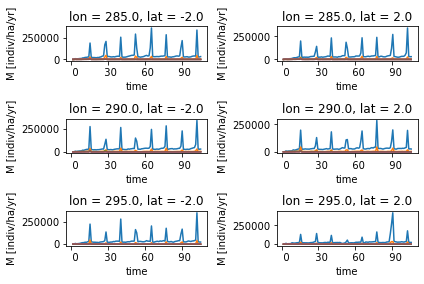

In [80]:
fig, axes = plt.subplots(ncols=2, nrows=3)
dsJUNE.MORTALITY.attrs['long_name'] = 'M'
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[0], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[1], lon=lons[0], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[0], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[1], lon=lons[1], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[0], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=dsJUNE.MORTALITY.isel(lat=lats[1], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Plot out one years worth of mortality output

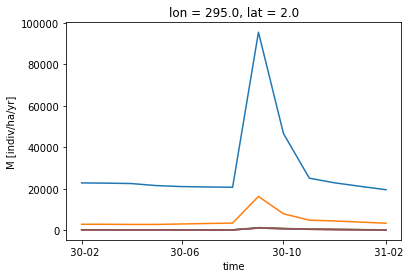

In [32]:
#print(ds.MORTALITY)
pbiomasst=ds.MORTALITY.isel(time=[0,1,2,3,4,5,6,7,8,9,10,11,12],lat=lats[1], lon=lons[2], fates_levpft=pft)
pbiomasst.plot.line(x='time',  add_legend=False)


Now plotting out all of the mortality types for our first site above. Only, 1 (background), 2, (C starvation) and 5(termination) are important.
None has the sam magnitude as the total mortality output. Carbon starvation has a similar periodicity to the overall mortality. 

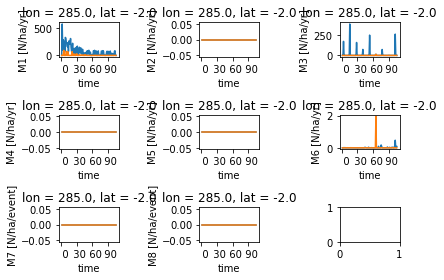

In [87]:
fig, axes = plt.subplots(ncols=3, nrows=3)
sc = [1,2]
dsJUNE.M1_SCLS.attrs['long_name'] = 'M1'
dsJUNE.M2_SCLS.attrs['long_name'] = 'M2'
dsJUNE.M3_SCLS.attrs['long_name'] = 'M3'
dsJUNE.M4_SCLS.attrs['long_name'] = 'M4'
dsJUNE.M5_SCLS.attrs['long_name'] = 'M5'
dsJUNE.M6_SCLS.attrs['long_name'] = 'M6'
dsJUNE.M7_SCLS.attrs['long_name'] = 'M7'
dsJUNE.M8_SCLS.attrs['long_name'] = 'M8'

pbiomasst=dsJUNE.M1_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=dsJUNE.M2_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=dsJUNE.M3_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 2], add_legend=False)
pbiomasst=dsJUNE.M4_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=dsJUNE.M5_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=dsJUNE.M6_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 2], add_legend=False)
pbiomasst=dsJUNE.M7_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=dsJUNE.M8_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()

In [ ]:
Now to look at this in more detail. Read in every month in the 30s.. 

In [89]:
arc= scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
ds30s = xr.open_mfdataset((arc + '003*.nc'))

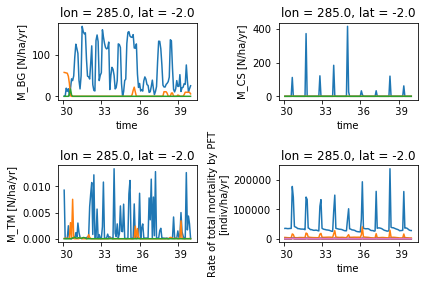

In [93]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2,3]
ds30s.M1_SCLS.attrs['long_name'] = 'M_BG'
ds30s.M3_SCLS.attrs['long_name'] = 'M_CS'
ds30s.M6_SCLS.attrs['long_name'] = 'M_TM'
pbiomasst=ds30s.M1_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)

pbiomasst=ds30s.M3_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds30s.M6_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)

pbiomasst=ds30s.MORTALITY.isel(lat=lats[0], lon=lons[0])
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2)
tm = [2,3,4,5,6,7,8,9,10,11]
ds30s.M1_SCLS.attrs['long_name'] = 'M_BG'
ds30s.M3_SCLS.attrs['long_name'] = 'M_CS'
ds30s.M6_SCLS.attrs['long_name'] = 'M_TM'
pbiomasst=ds30s.M1_SCLS.isel(time=tm, lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)

pbiomasst=ds30s.M3_SCLS.isel(time=tm, lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds30s.M6_SCLS.isel(time=tm, lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)

pbiomasst=ds30s.MORTALITY.isel(time=tm, lat=lats[0], lon=lons[0])
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

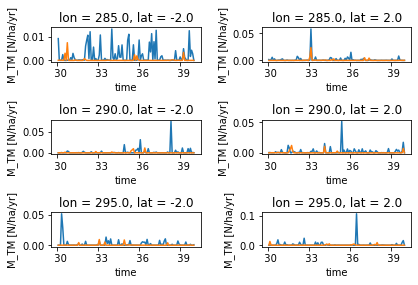

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=3)
sc = [1,2]
ds.M6_SCLS.attrs['long_name'] = 'M_TM'
pbiomasst=ds.M6_SCLS.isel(lat=lats[0], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.M6_SCLS.isel(lat=lats[1], lon=lons[0], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=ds.M6_SCLS.isel(lat=lats[0], lon=lons[1], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.M6_SCLS.isel(lat=lats[1], lon=lons[1], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=ds.M6_SCLS.isel(lat=lats[0], lon=lons[2], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.M6_SCLS.isel(lat=lats[1], lon=lons[2], fates_levscls=sc)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()